# store_nbr 별 item_nbr 간 상관관계를 구해보려 합니다. ( 조건 : 같은 날에 팔린 것을 기준으로..)

# 먼저 각 store_nbr 별 팔린 item_nbr 만 추려내서 데이터 프레임을 생성하겠습니다

In [41]:
import set_math

In [120]:
%matplotlib inline

In [42]:
data = pd.read_csv('../data/05. data_sample_V3', index_col = 0)
data.head()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday
0,2012-01-01,1,1,9,29,M,RA FZFG BR,Sun,holiday
1,2012-01-01,1,1,28,2,M,RA FZFG BR,Sun,holiday
2,2012-01-01,1,1,51,1,M,RA FZFG BR,Sun,holiday
3,2012-01-01,2,16,16,25,16,RA,Sun,holiday
4,2012-01-01,2,16,25,187,16,RA,Sun,holiday


In [43]:
item_unit_df = pd.DataFrame(data, columns=['date','station_nbr', 'store_nbr', 'item_nbr', 'units'])

In [44]:
item_unit_df.tail()

,date,station_nbr,store_nbr,item_nbr,units
118689,2014-10-31,19,30,16,19
118690,2014-10-31,19,30,44,69
118691,2014-10-31,19,30,65,1
118692,2014-10-31,20,17,9,24
118693,2014-10-31,20,17,37,25


# store_nbr = 1 인 것들만 실험적으로 해보죠

In [64]:
store_nbr_1 = item_unit_df[item_unit_df['store_nbr'].isin([1])].reset_index(drop = True)
store_nbr_1.head()

,date,station_nbr,store_nbr,item_nbr,units
0,2012-01-01,1,1,9,29
1,2012-01-01,1,1,28,2
2,2012-01-01,1,1,51,1
3,2012-01-07,1,1,9,2
4,2012-01-07,1,1,28,1


In [65]:
store_nbr_1 = store_nbr_1.pivot_table(values = 'units', index = ['date'], columns=['item_nbr'], aggfunc = np.sum, fill_value = 0)

In [66]:
store_nbr_1.head()

item_nbr,9,28,40,47,51,89,93,99
date,,,,,,,,
2012-01-01,29,2,0,0,1,0,0,0
2012-01-02,60,5,0,0,1,0,0,0
2012-01-03,15,9,0,0,0,0,0,0
2012-01-04,20,3,0,0,0,0,0,0
2012-01-05,16,1,0,0,0,0,0,0


# item_nbr 별로 array를 생성해 줍니다.

In [110]:
store_nbr_1_corr = store_nbr_1.corr()
store_nbr_1_corr

item_nbr,9,28,40,47,51,89,93,99
item_nbr,,,,,,,,
9,1.000000,0.118978,0.107190,-0.007694,0.105353,0.035821,0.013317,0.044022
28,0.118978,1.000000,0.090358,0.224022,0.087682,-0.003938,-0.099449,0.055952
40,0.107190,0.090358,1.000000,0.036602,0.219022,0.002646,-0.041844,0.087471
47,-0.007694,0.224022,0.036602,1.000000,-0.042762,-0.116828,-0.163624,0.305509
51,0.105353,0.087682,0.219022,-0.042762,1.000000,0.011336,-0.046455,-0.013525
89,0.035821,-0.003938,0.002646,-0.116828,0.011336,1.000000,0.113808,-0.069894
93,0.013317,-0.099449,-0.041844,-0.163624,-0.046455,0.113808,1.000000,-0.105892
99,0.044022,0.055952,0.087471,0.305509,-0.013525,-0.069894,-0.105892,1.000000


# heatmap으로 시각화 해야겠죠?

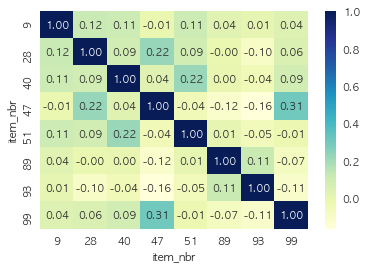

In [121]:
sns.heatmap(store_nbr_1_corr, cmap = "YlGnBu", annot = True, fmt = ".2f")

# 간단히 보면 1번 store의 47번 아이템과 99번 아이템이 가장 상관계수가 높네요! 그리고 40번과 51번이 0.22로 높은 것을 알 수 있습니다.

In [133]:
def store_item_nbr_cor(df,nbr):

    df_nbr = df[item_unit_df['store_nbr'].isin([nbr])].reset_index(drop = True)
    df_nbr = df_nbr.pivot_table(values = 'units', index = ['date'], columns=['item_nbr'], aggfunc = np.sum, fill_value = 0)
    corr = df_nbr.corr()
    sns.heatmap(corr, cmap = "YlGnBu", annot = True, fmt = ".2f")

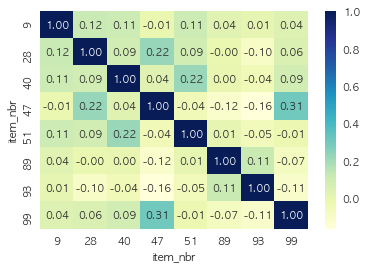

In [134]:
store_item_nbr_cor(item_unit_df,1)

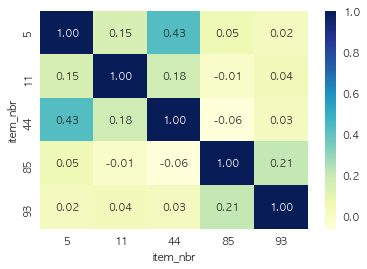

In [135]:
store_item_nbr_cor(item_unit_df,2)